# Intern Carrer Data Science Internship

## YouTube Streamer Analysis

**Description : This dataset contains valuable information about the top YouTube streamers, including their ranking, categories, subscribers, country, visits, likes, comments, and more. Your task is to perform a comprehensive analysis of the dataset to extract insights about the top YouTube content creators.**

#### Guidelines for Tasks:

1. Data Exploration:  
A) Start by exploring the dataset to understand its structure and identify key variables.  
B) Check for missing data and outliers.  

  
2. Trend Analysis:  
A) Identify trends among the top YouTube streamers. Which categories are the most popular?  
B) Is there a correlation between the number of subscribers and the number of likes or comments?  


3. Audience Study:  
A) Analyze the distribution of streamers audiences by country. Are there regional preferences for specific content categories?  

4. Performance Metrics:  
A) Calculate and visualize the average number of subscribers, visits, likes, and comments.  
B) Are there patterns or anomalies in these metrics? categories and performance metrics.  


5. Content Categories:  
A) Explore the distribution of content categories. Which categories have the highest number of streamers?  
B) Are there specific categories with exceptional performance metrics?  


6. Brands and Collaborations:  
A) Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.  


7. Benchmarking:  
A) Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.  
B) Who are the top-performing content creators?  


8. Content Recommendations:  
A) Propose a system for enhancing content recommendations to YouTube users based on streamers categories and performance metrics.  

In [1]:
# Importing Required Lobraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import datetime as dt
import re
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import collections
from collections import Counter
from collections import defaultdict
import itertools
from scipy import stats
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Data Reading

In [2]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Data Science Internship\youtubers_df.csv")
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [3]:
# We can see that we have spelling mistake in (Suscribers) column

In [4]:
# Correcting the column name type
df.rename(columns={'Suscribers': 'Subscribers'}, inplace=True)

### Data Exploration

In [5]:
# Checking the shape of our dataset.
df.shape

(1000, 9)

Here we can see that we have 1000 records and 9 column in our dataset.

In [6]:
# Checking null values in our Dataset.
df.isnull().sum()

Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

In [7]:
# We can see that in categories column we have 306 null values present.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         1000 non-null   int64  
 1   Username     1000 non-null   object 
 2   Categories   694 non-null    object 
 3   Subscribers  1000 non-null   float64
 4   Country      1000 non-null   object 
 5   Visits       1000 non-null   float64
 6   Likes        1000 non-null   float64
 7   Comments     1000 non-null   float64
 8   Links        1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [9]:
# Fill null values in 'Categories' with the Mode

most_common_route = df['Categories'].mode()[0]
df['Categories'].fillna(most_common_route, inplace=True)

In [10]:
# Checking null values is filled or not
df.isnull().sum()

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

In [11]:
colname = []
for x in df.columns:
    if df[x].dtype=="object":
        colname.append(x)
colname

['Username', 'Categories', 'Country', 'Links']

In [12]:
# converting Categorical Data to numerical.

# Define the column to Lebel encode.
columns_to_encode = ['Username', 'Categories', 'Country', 'Links']

# Create a label encoder instance.
label_encoder = LabelEncoder()

# Apply label encoding to the specified column(s)
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [13]:
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,939,29,249500000.0,13,86200.0,2700.0,78.0,826
1,2,368,42,183500000.0,10,117400000.0,5300000.0,18500.0,506
2,3,107,20,165500000.0,28,7000000.0,24700.0,0.0,588
3,4,467,29,162600000.0,13,15600.0,166.0,9.0,807
4,5,275,5,113500000.0,28,3900000.0,12400.0,0.0,731


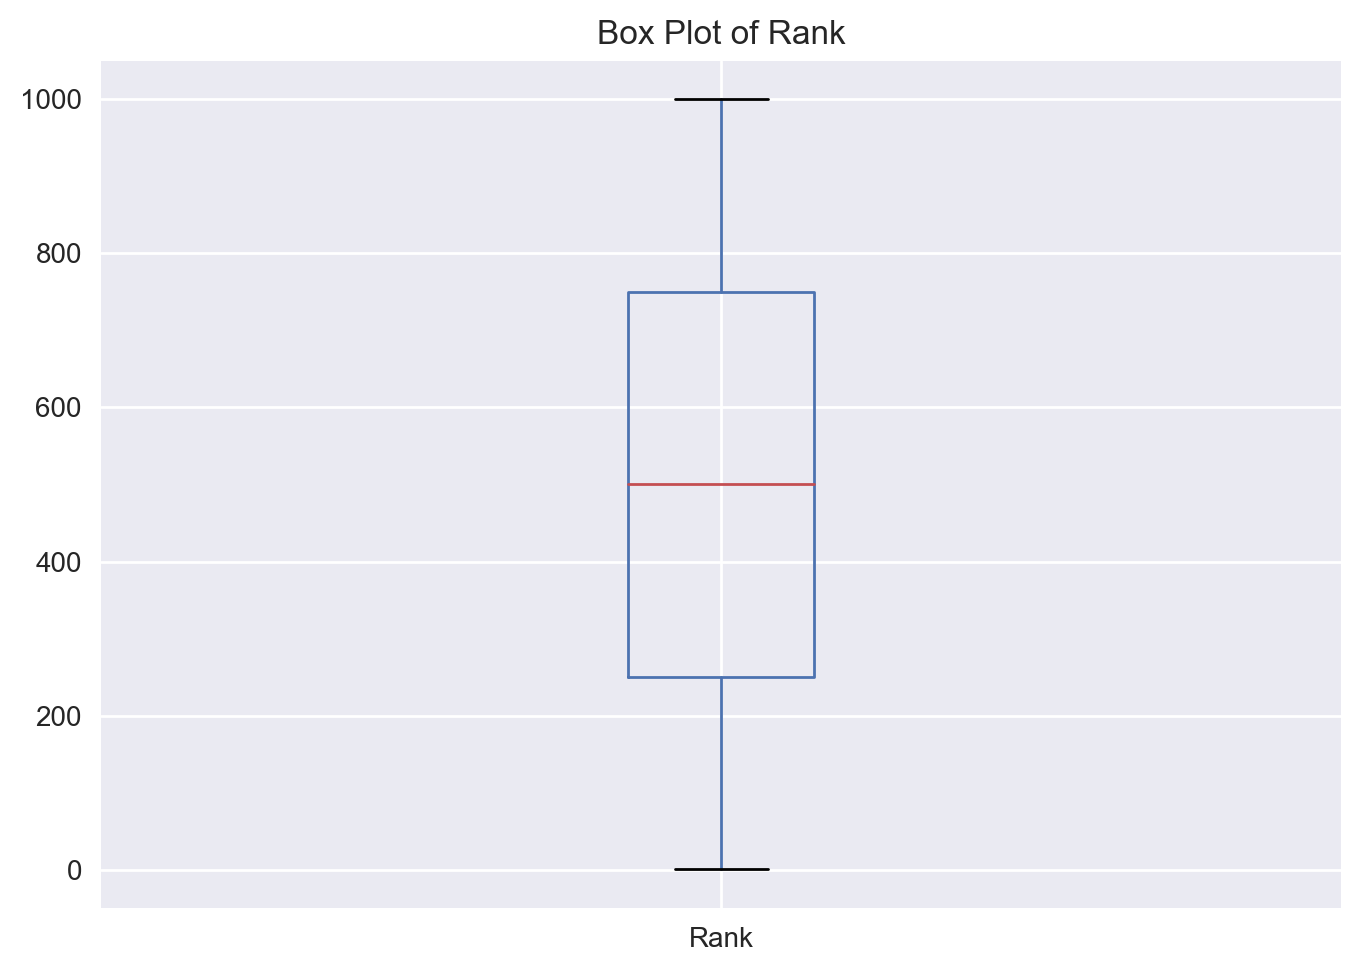

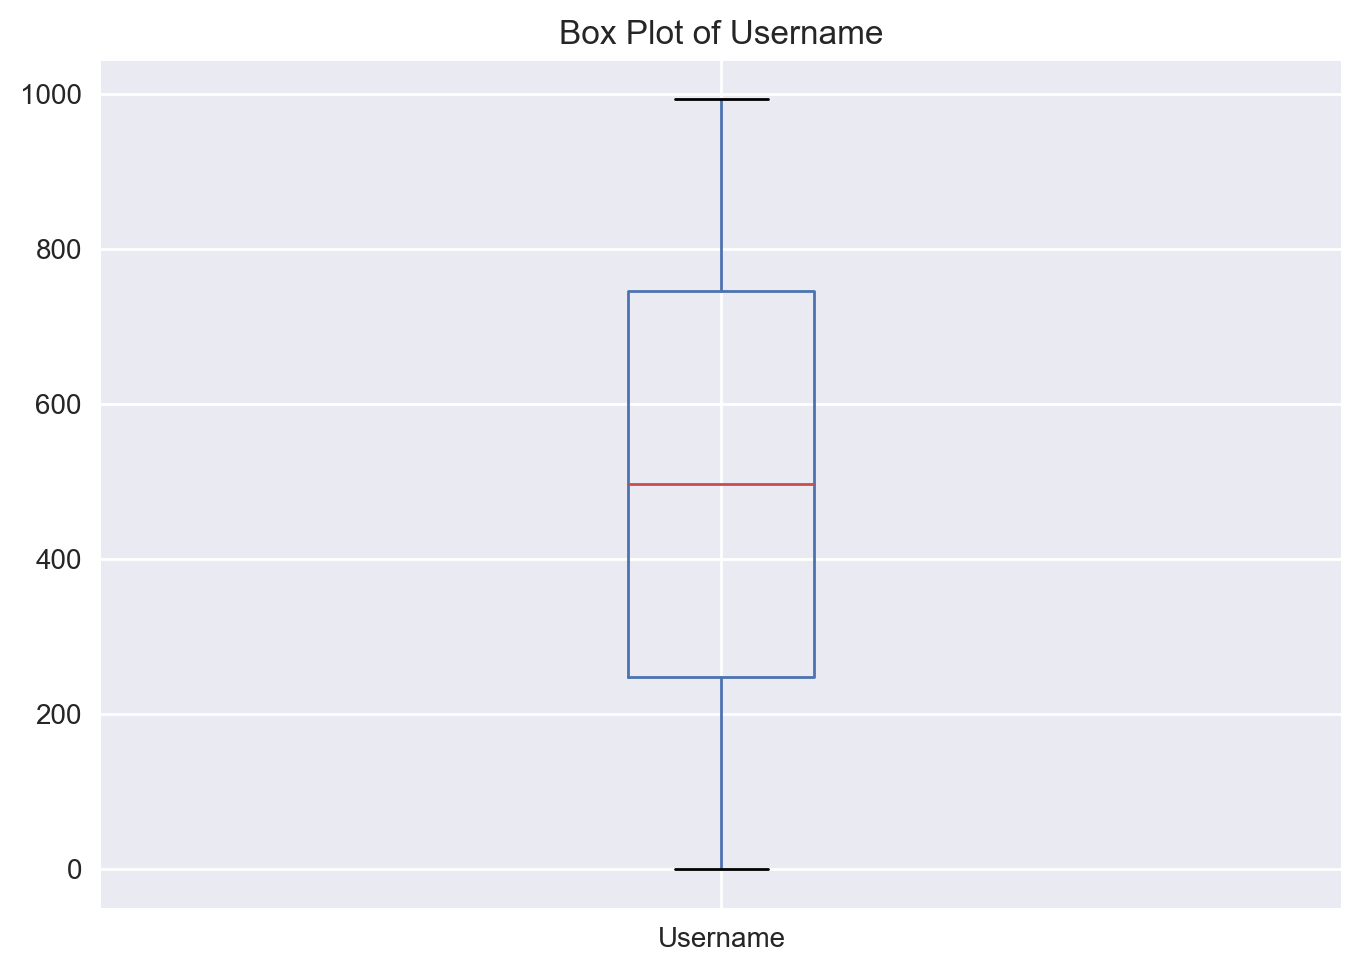

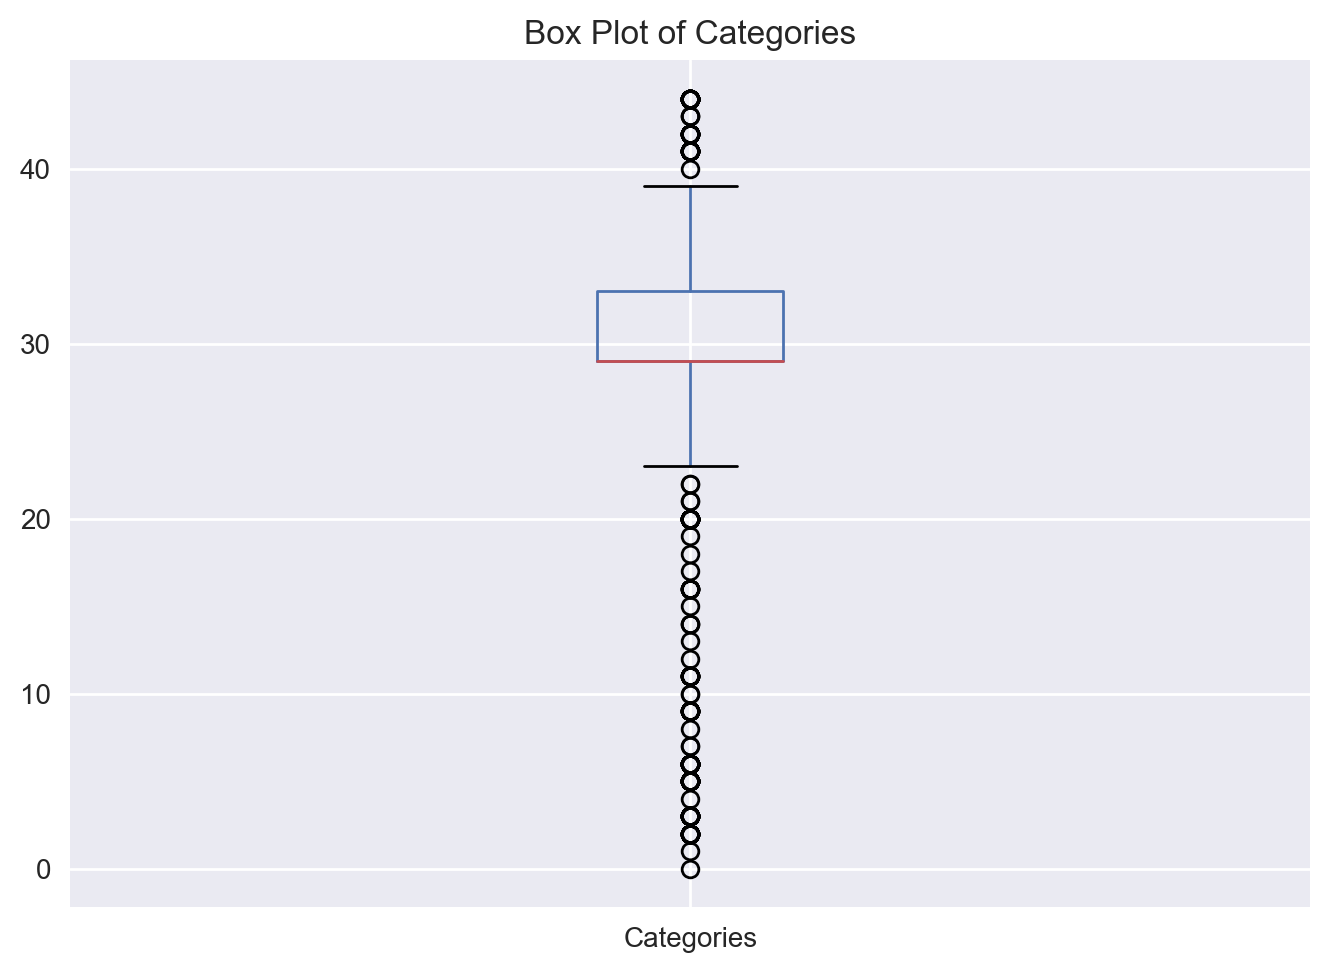

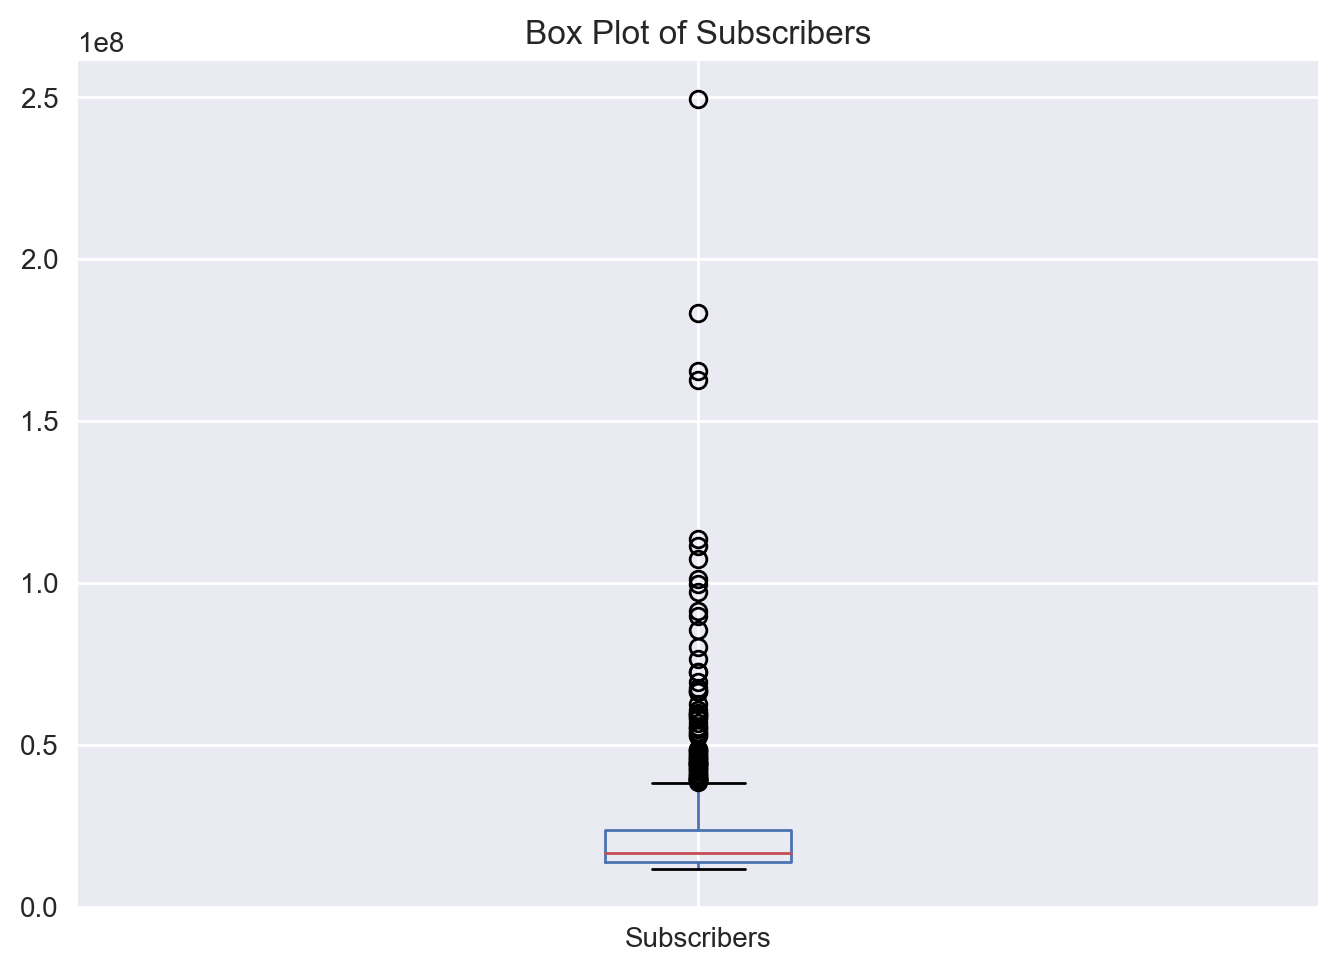

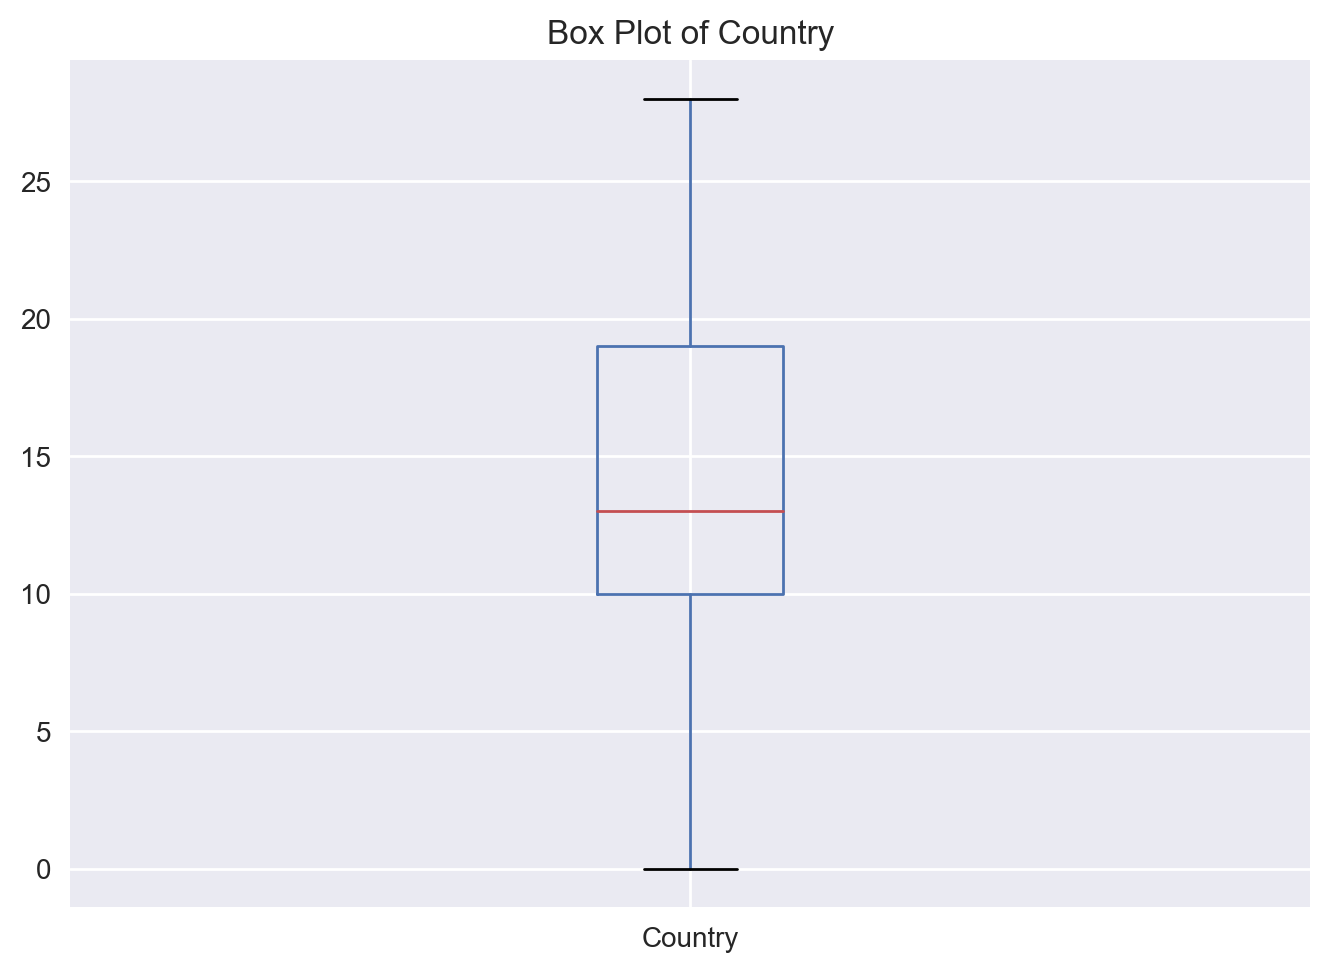

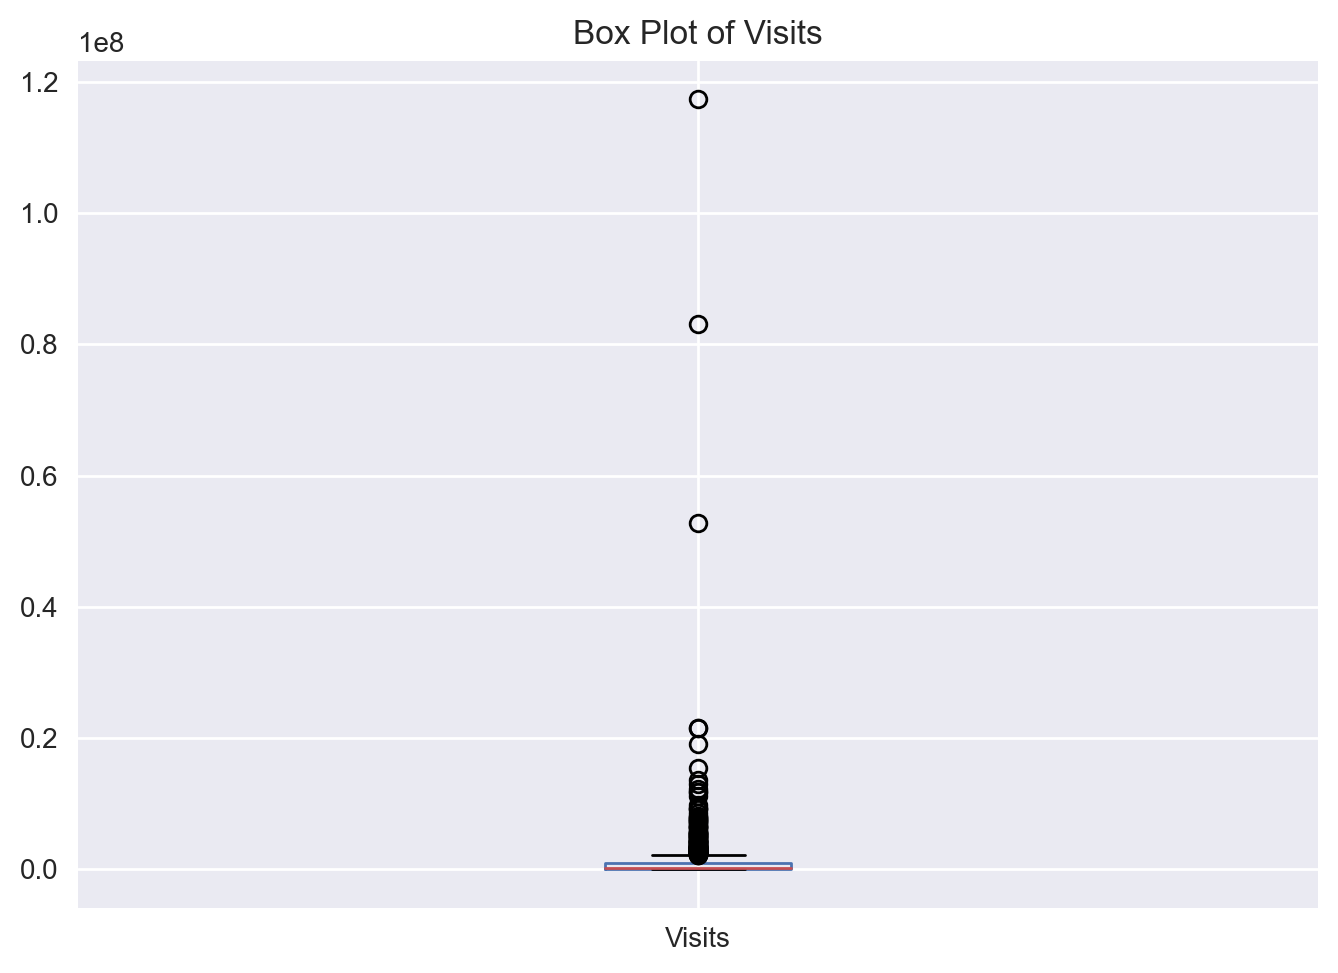

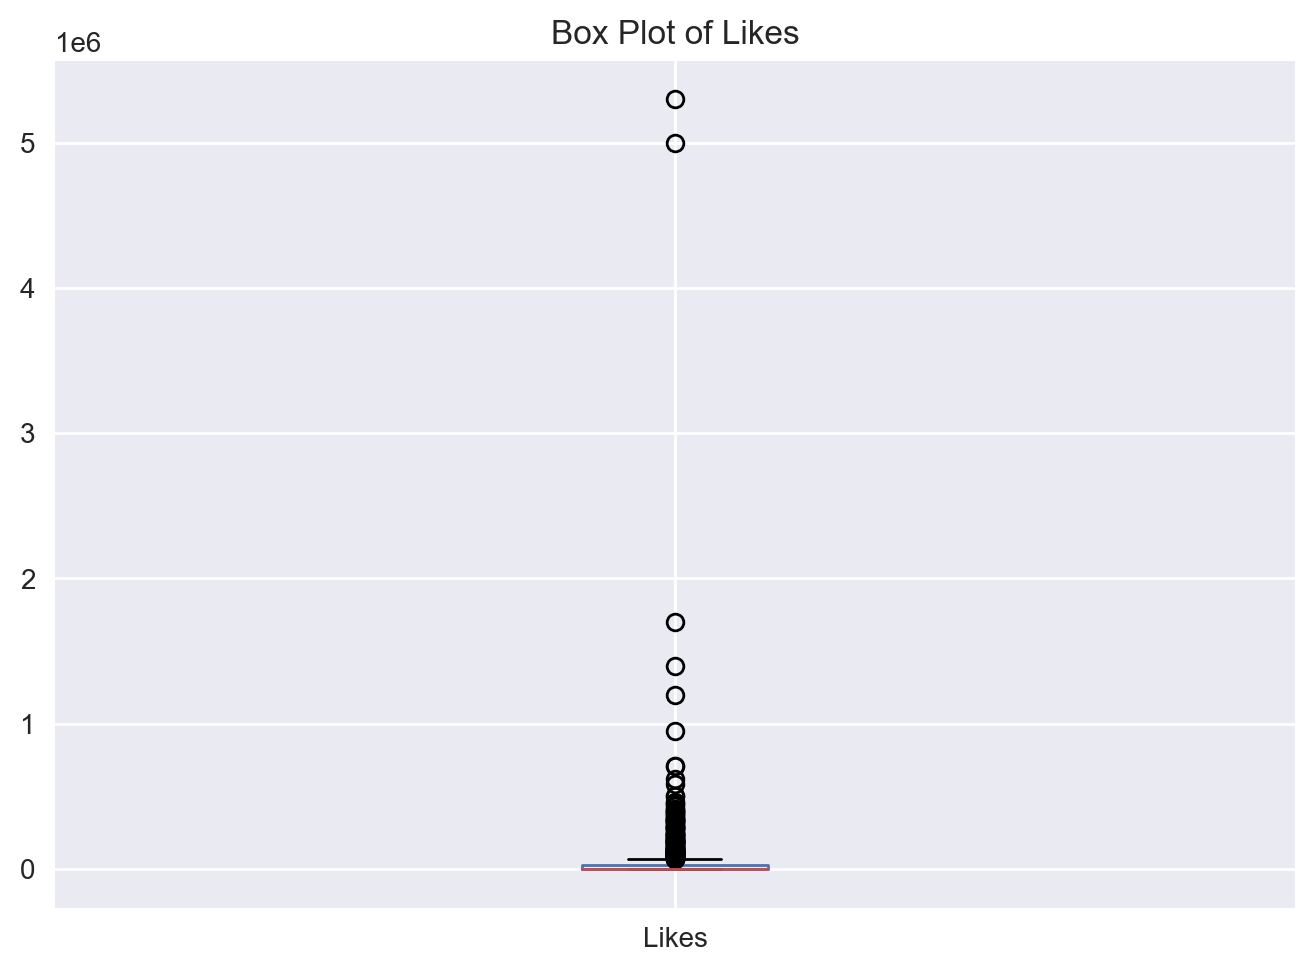

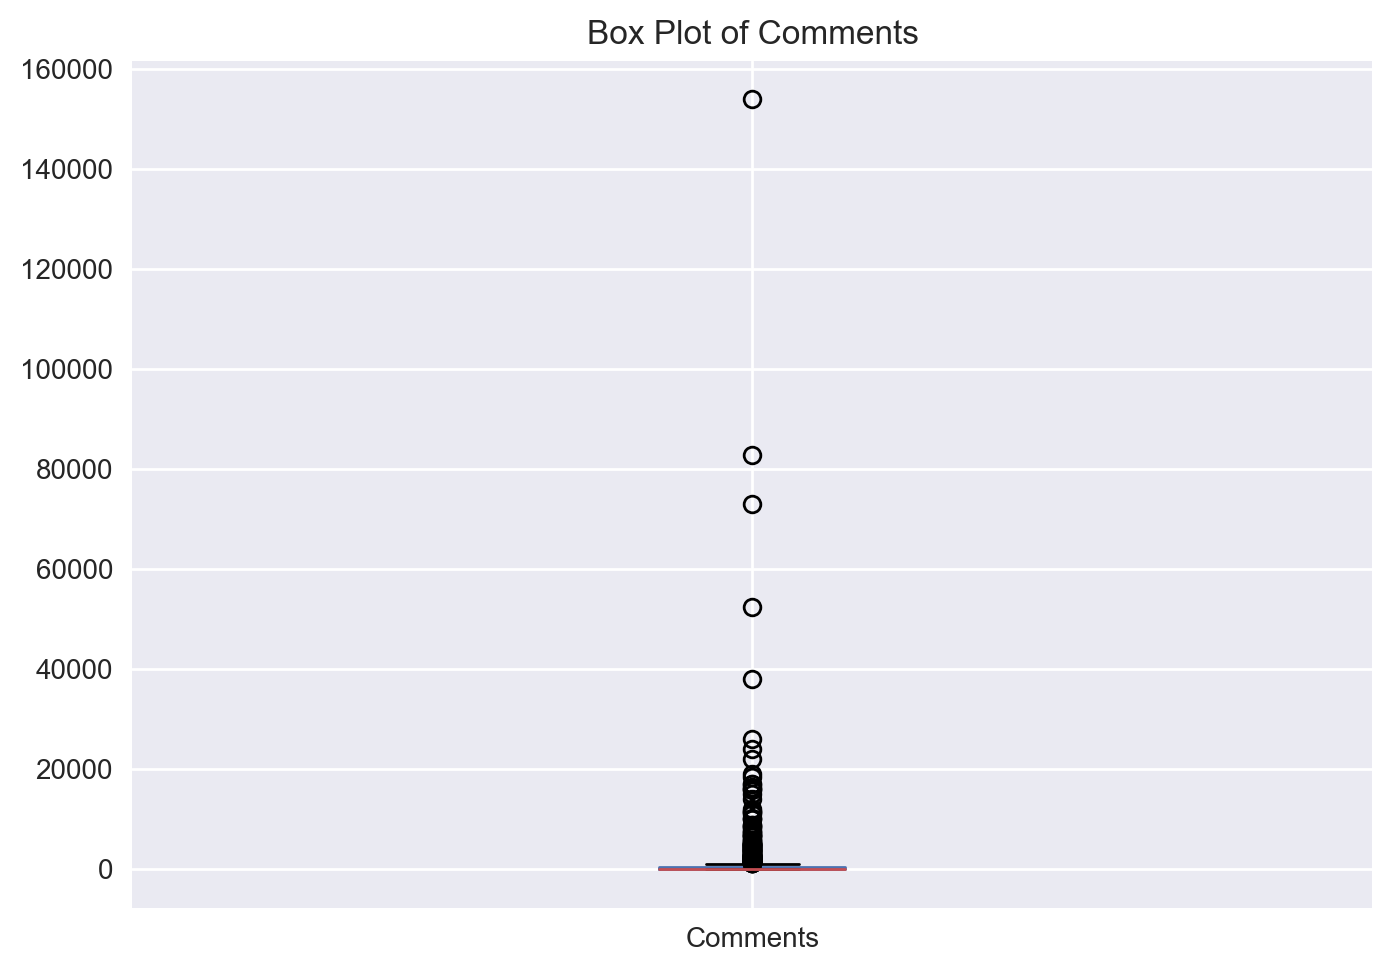

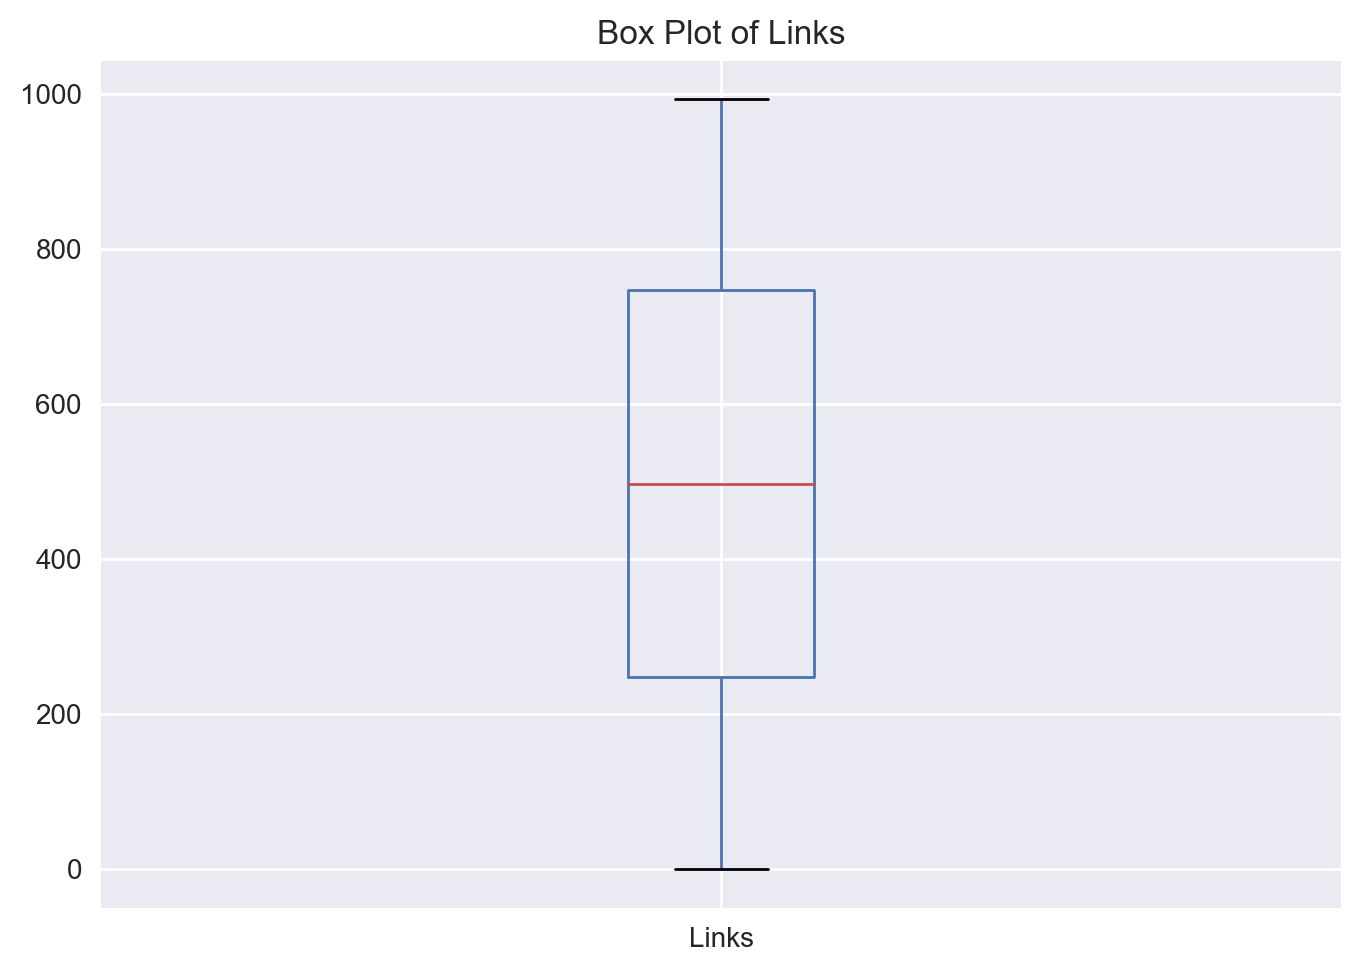

In [14]:
#Checking for outliers

numerical_columns = df.select_dtypes(include=['number'])

# Create box plots for each numerical column
for column in numerical_columns.columns:
    df.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.show()
    
#logically relevent values should not be consider as outliers.
#When outliers are detected as cluster of points do not treat them.

### Trend Analysis

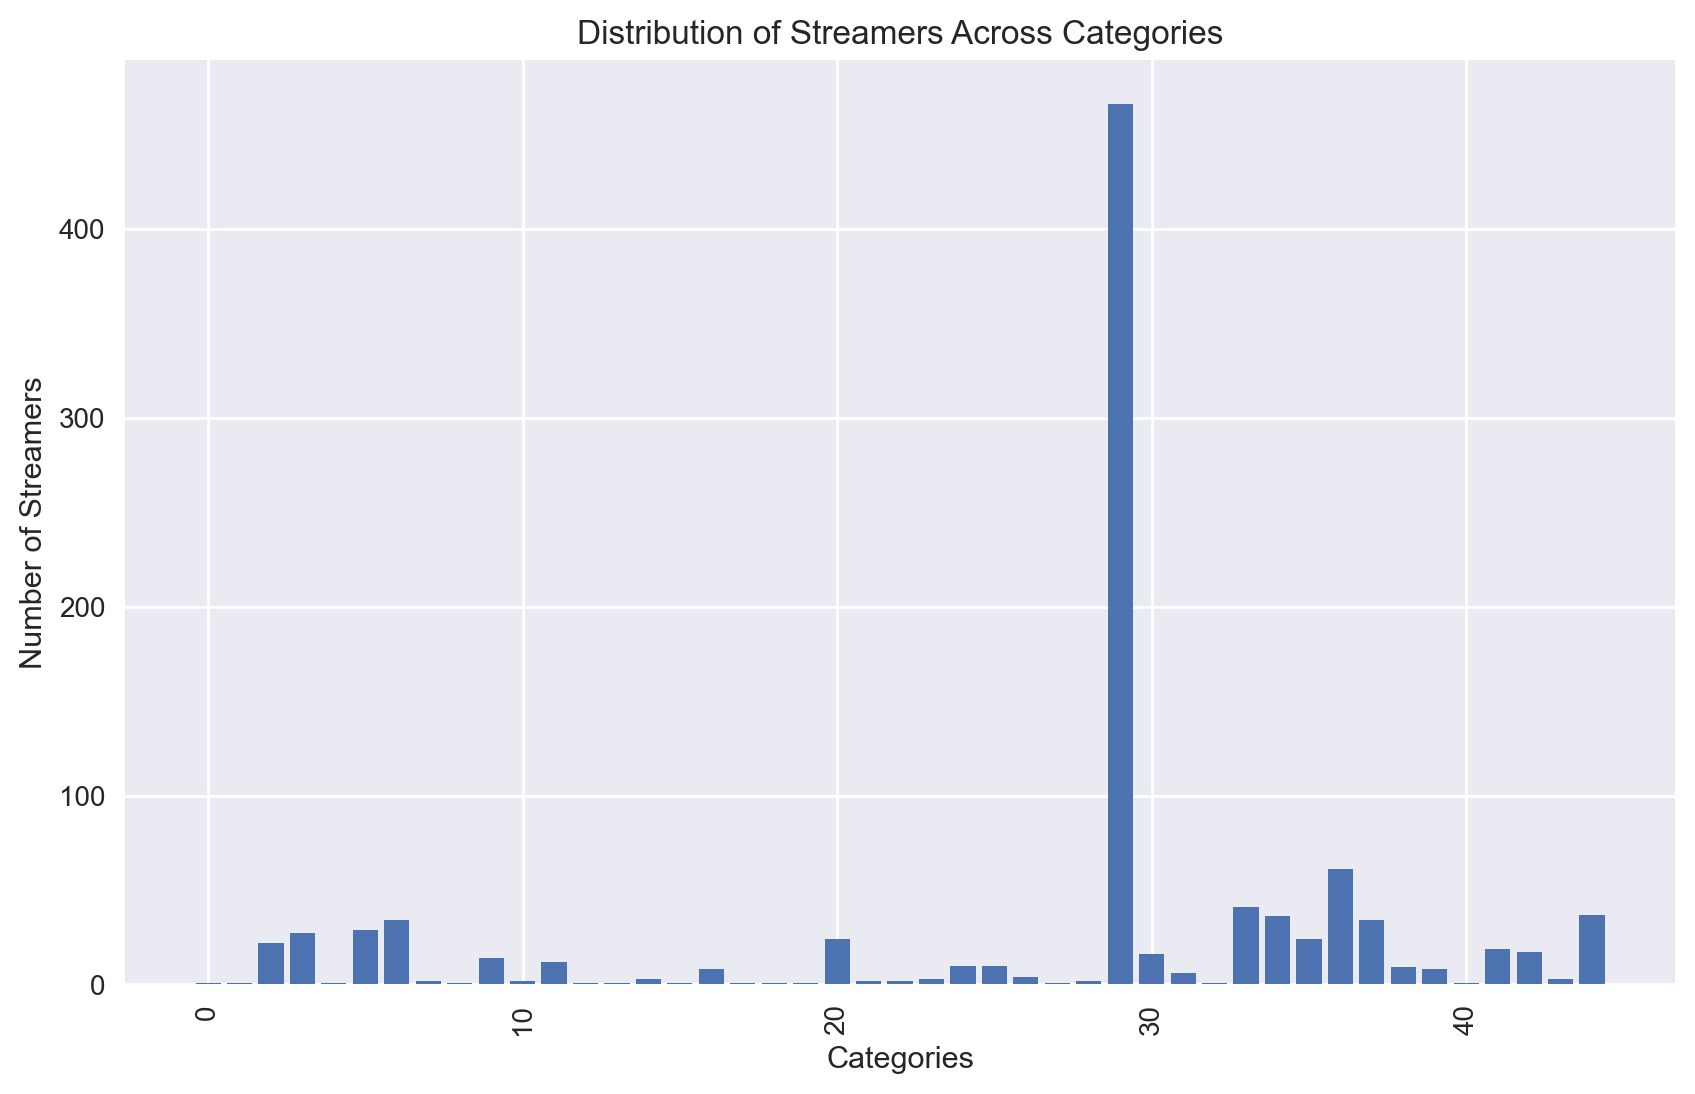

In [15]:
# Trend Analysis: Categories Distribution
category_counts = df['Categories'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of Streamers Across Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

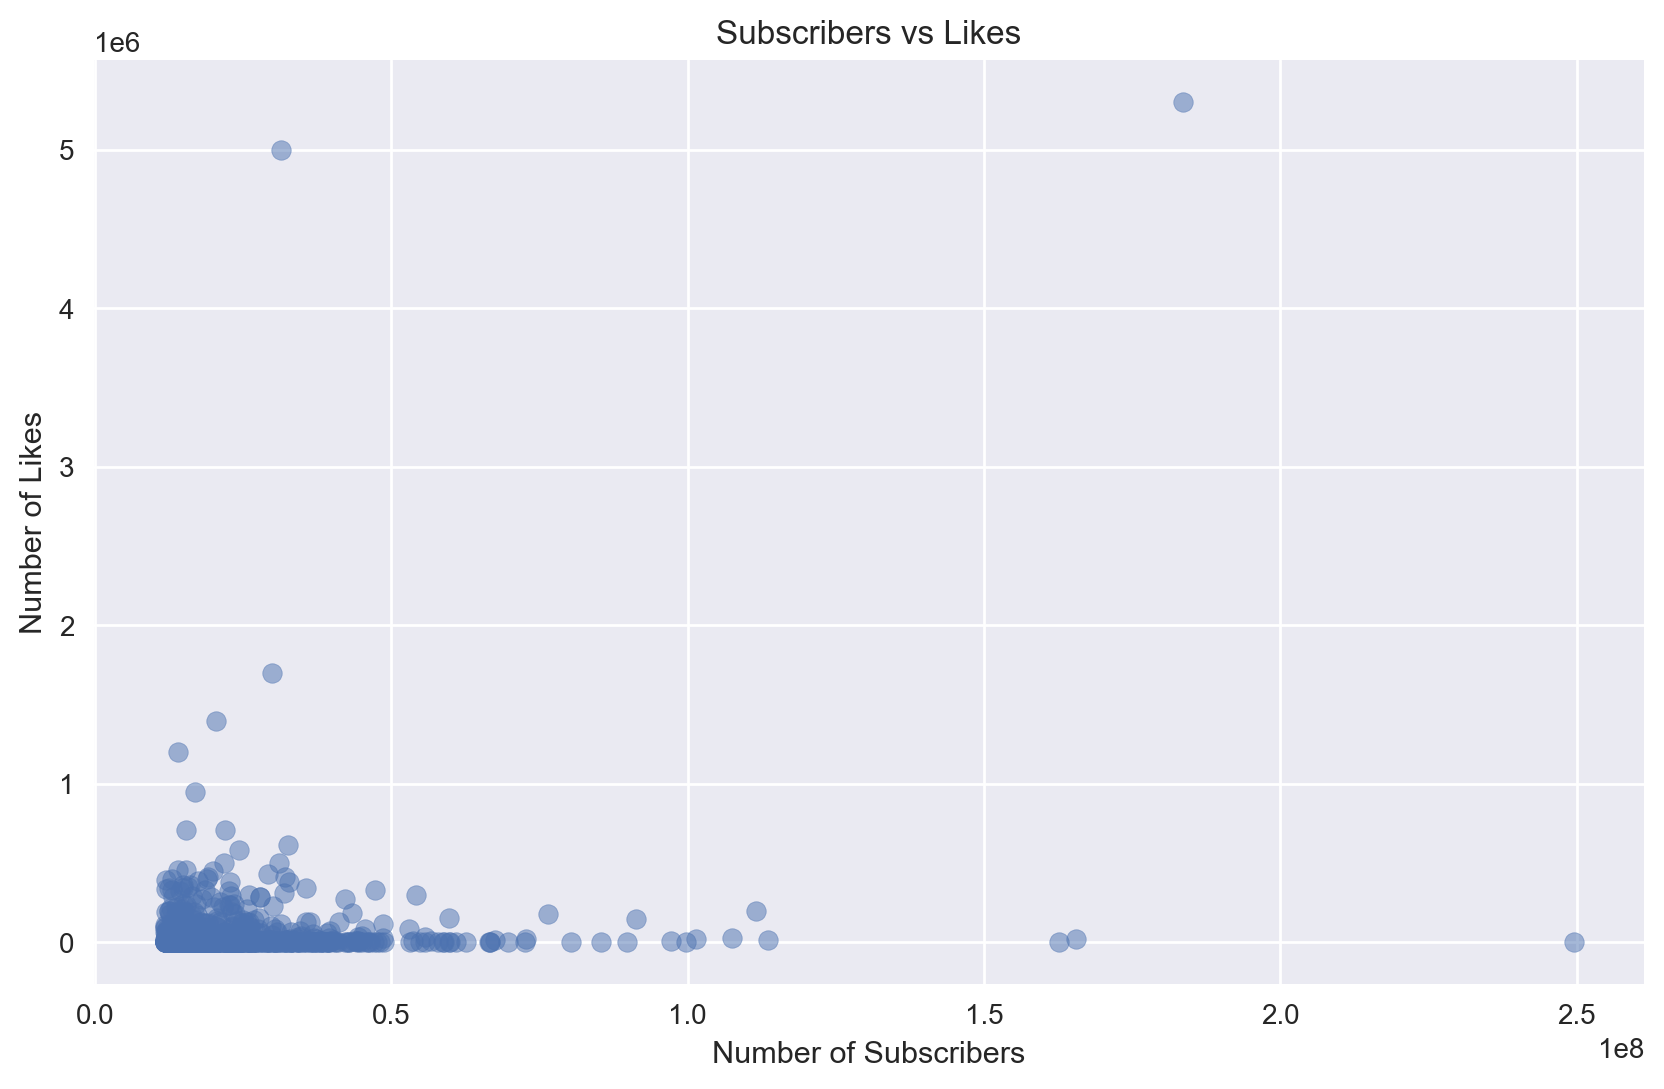

In [16]:
# Trend Analysis: Subscribers vs Likes
plt.figure(figsize=(10, 6))
plt.scatter(df['Subscribers'], df['Likes'], alpha=0.5)
plt.title('Subscribers vs Likes')
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Likes')
plt.show()

<Axes: >

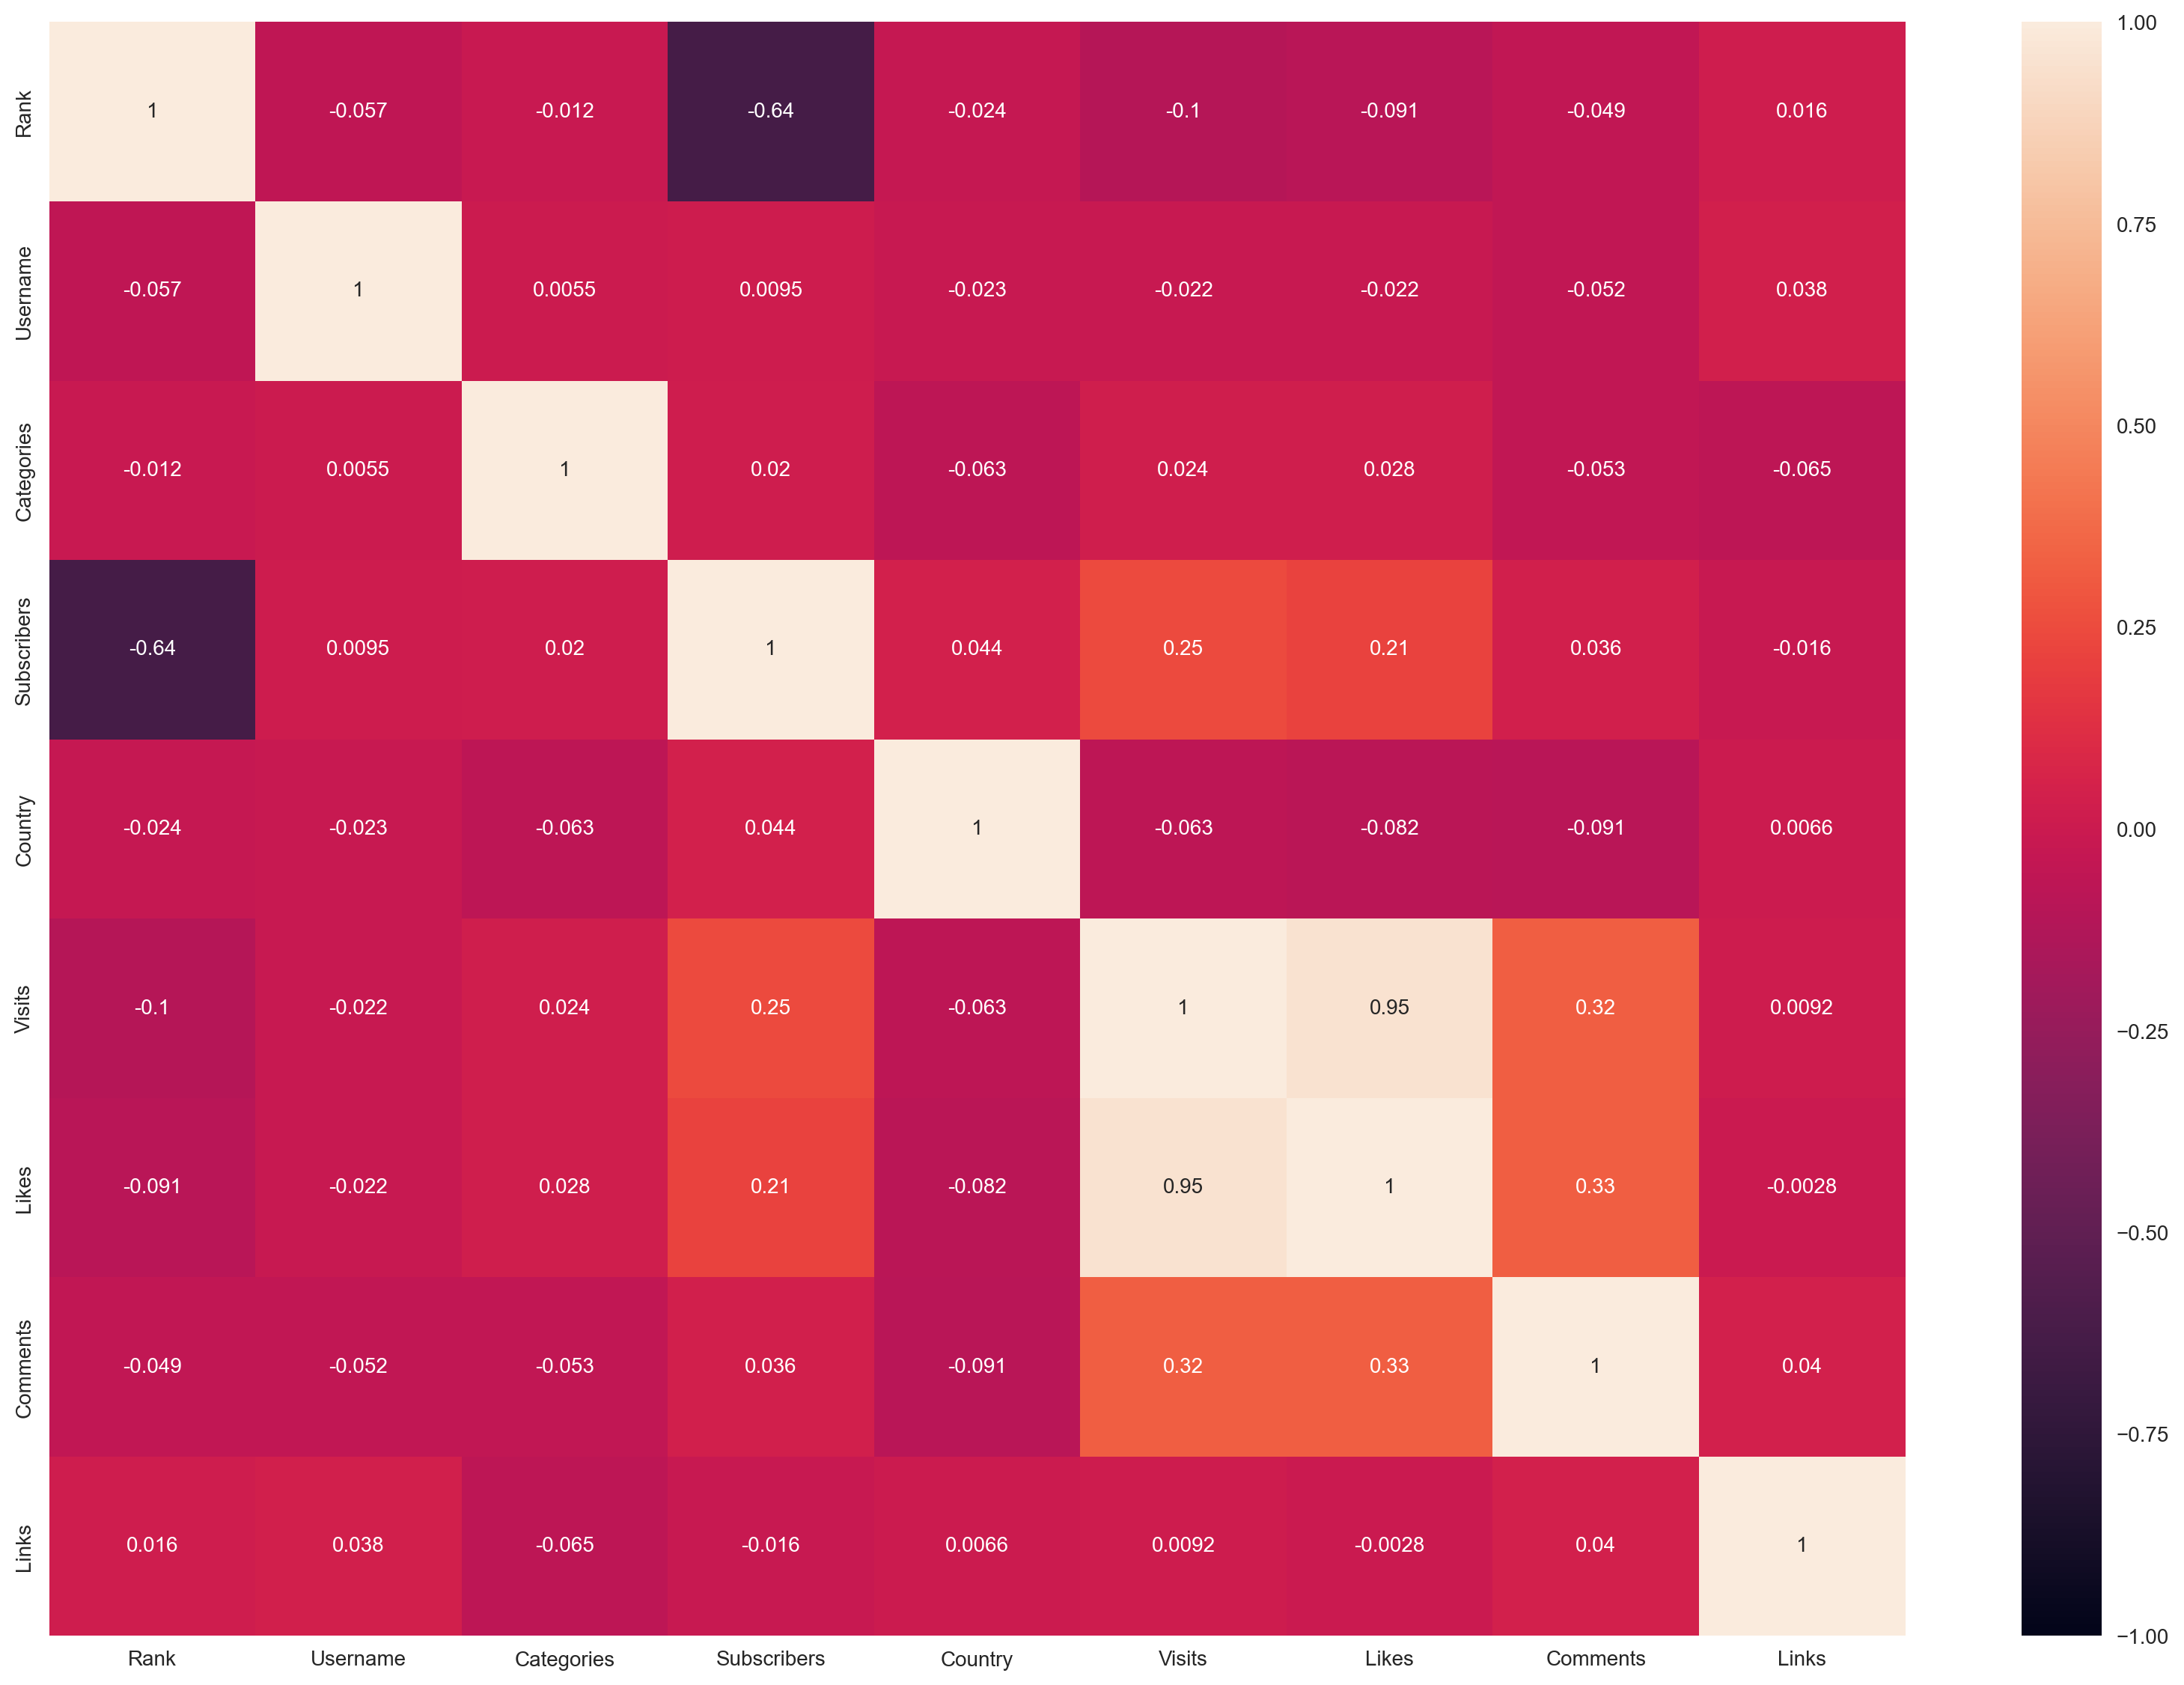

In [17]:
corr_df = df.corr(method="pearson")
plt.figure(figsize = (20,14))
#print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

**Correlation between Subscribers and Likes: 0.21163868368008437**

### Audience Study

<Figure size 1200x800 with 0 Axes>

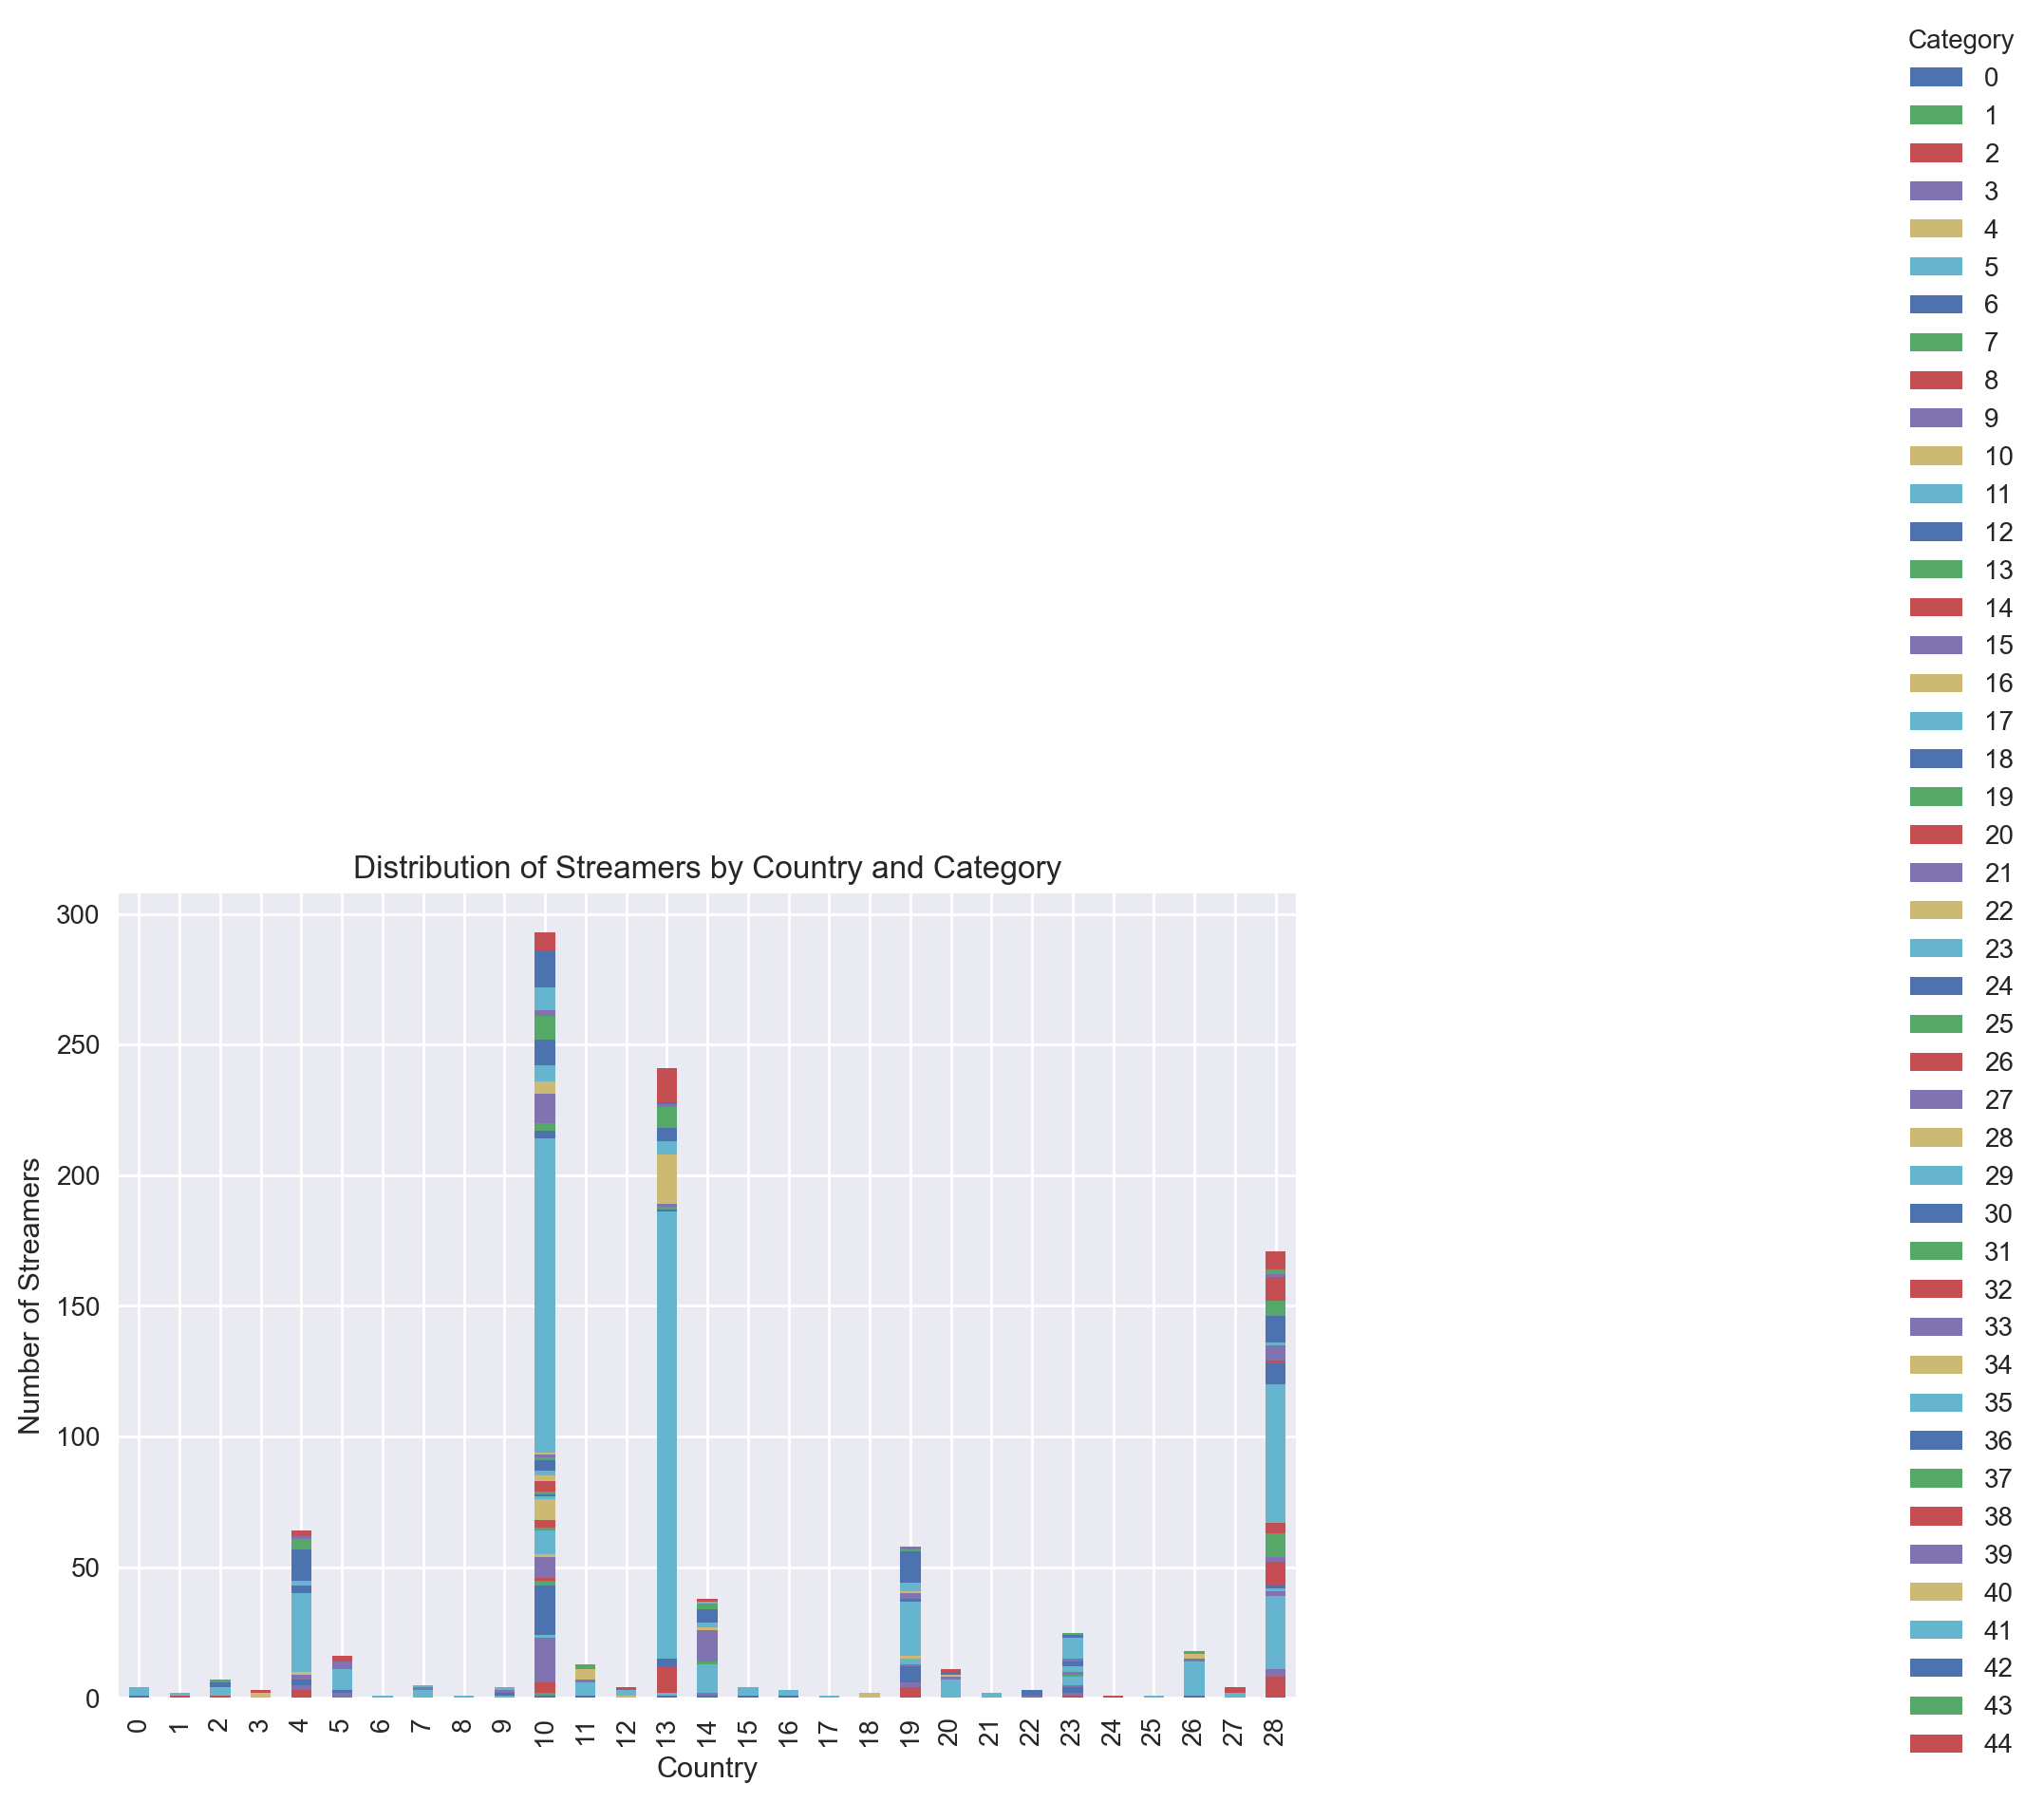

In [18]:
# Group streamers by country and category
country_category_counts = df.groupby(['Country', 'Categories']).size().unstack(fill_value=0)

# Create a stacked bar chart to show the distribution
plt.figure(figsize=(12, 8))
country_category_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Streamers by Country and Category')
plt.xlabel('Country')
plt.ylabel('Number of Streamers')
plt.legend(title='Category', loc='center left', bbox_to_anchor=(1.5, 1))
plt.show()

### Performance Metrics

In [19]:
# We calculate the average number of suscribers, visits, likes, and comments using the mean() method for each respective column.
# Calculate average metrics
avg_subscribers = df['Subscribers'].mean()
avg_visits = df['Visits'].mean()
avg_likes = df['Likes'].mean()
avg_comments = df['Comments'].mean()

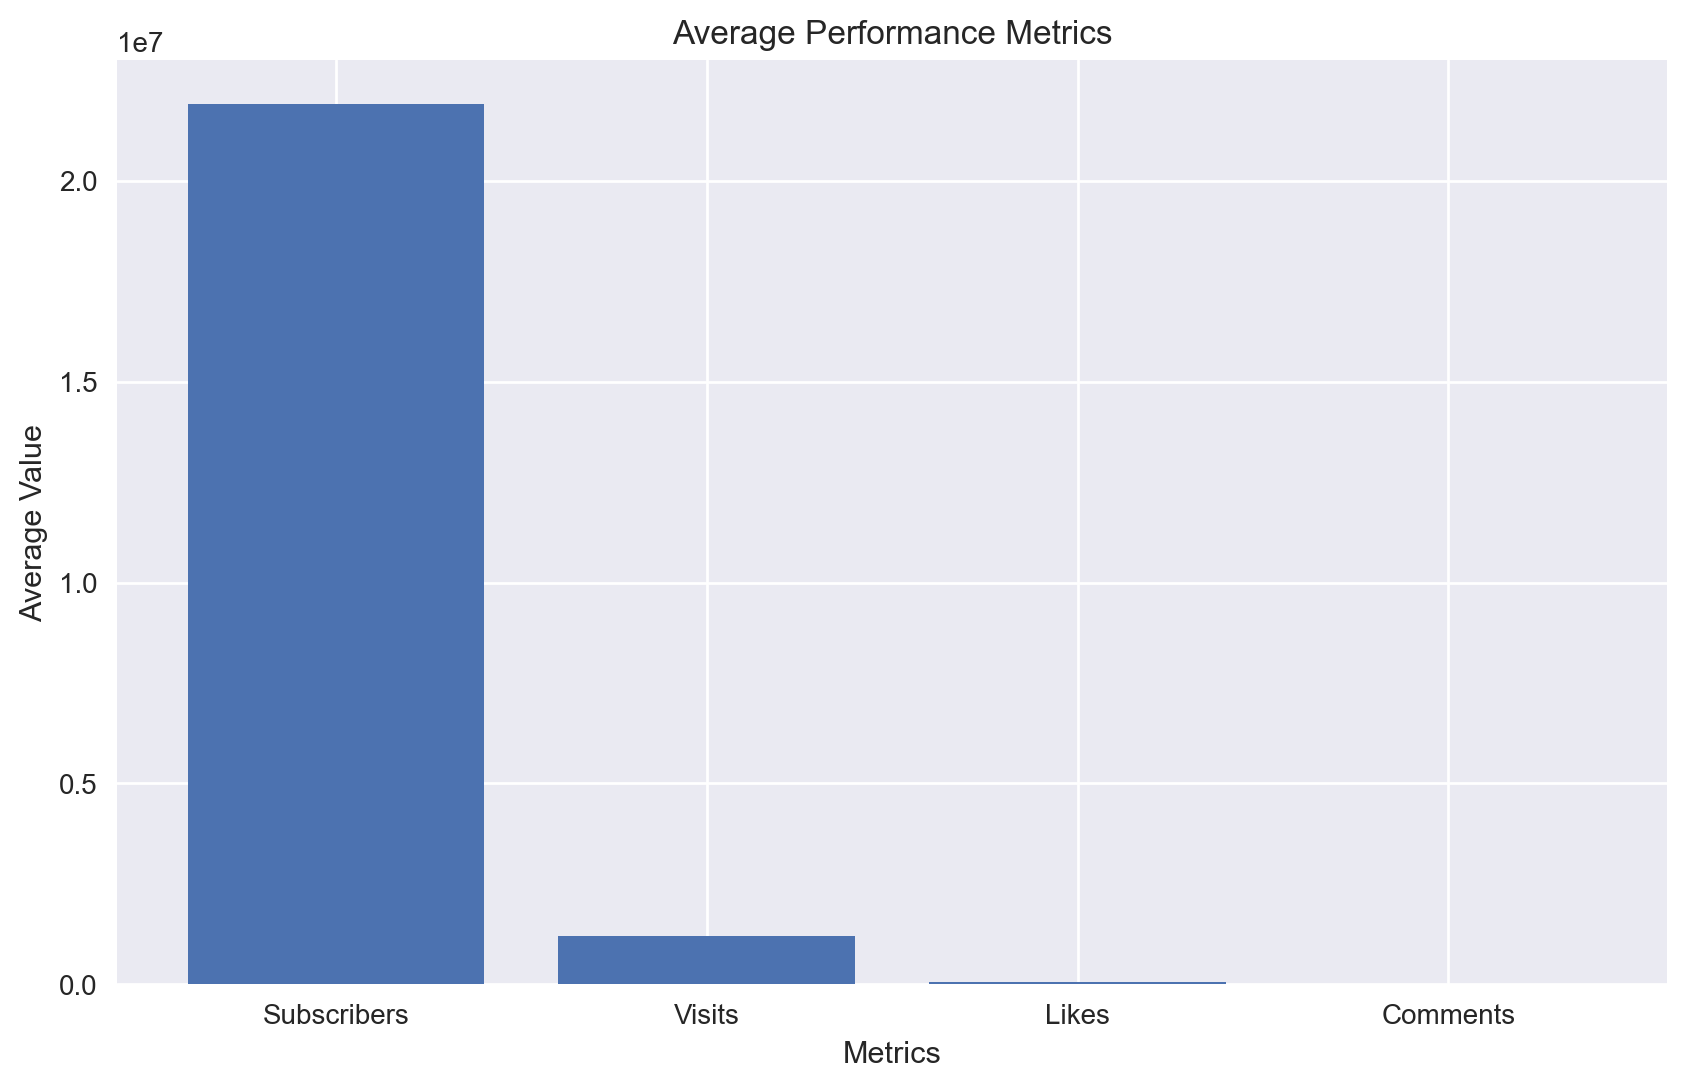

In [20]:
# Create bar chart to visualize average metrics
metrics = ['Subscribers', 'Visits', 'Likes', 'Comments']
avg_values = [avg_subscribers, avg_visits, avg_likes, avg_comments]

plt.figure(figsize=(10, 6))
plt.bar(metrics, avg_values)
plt.title('Average Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Average Value')
plt.show()

### Content Categories

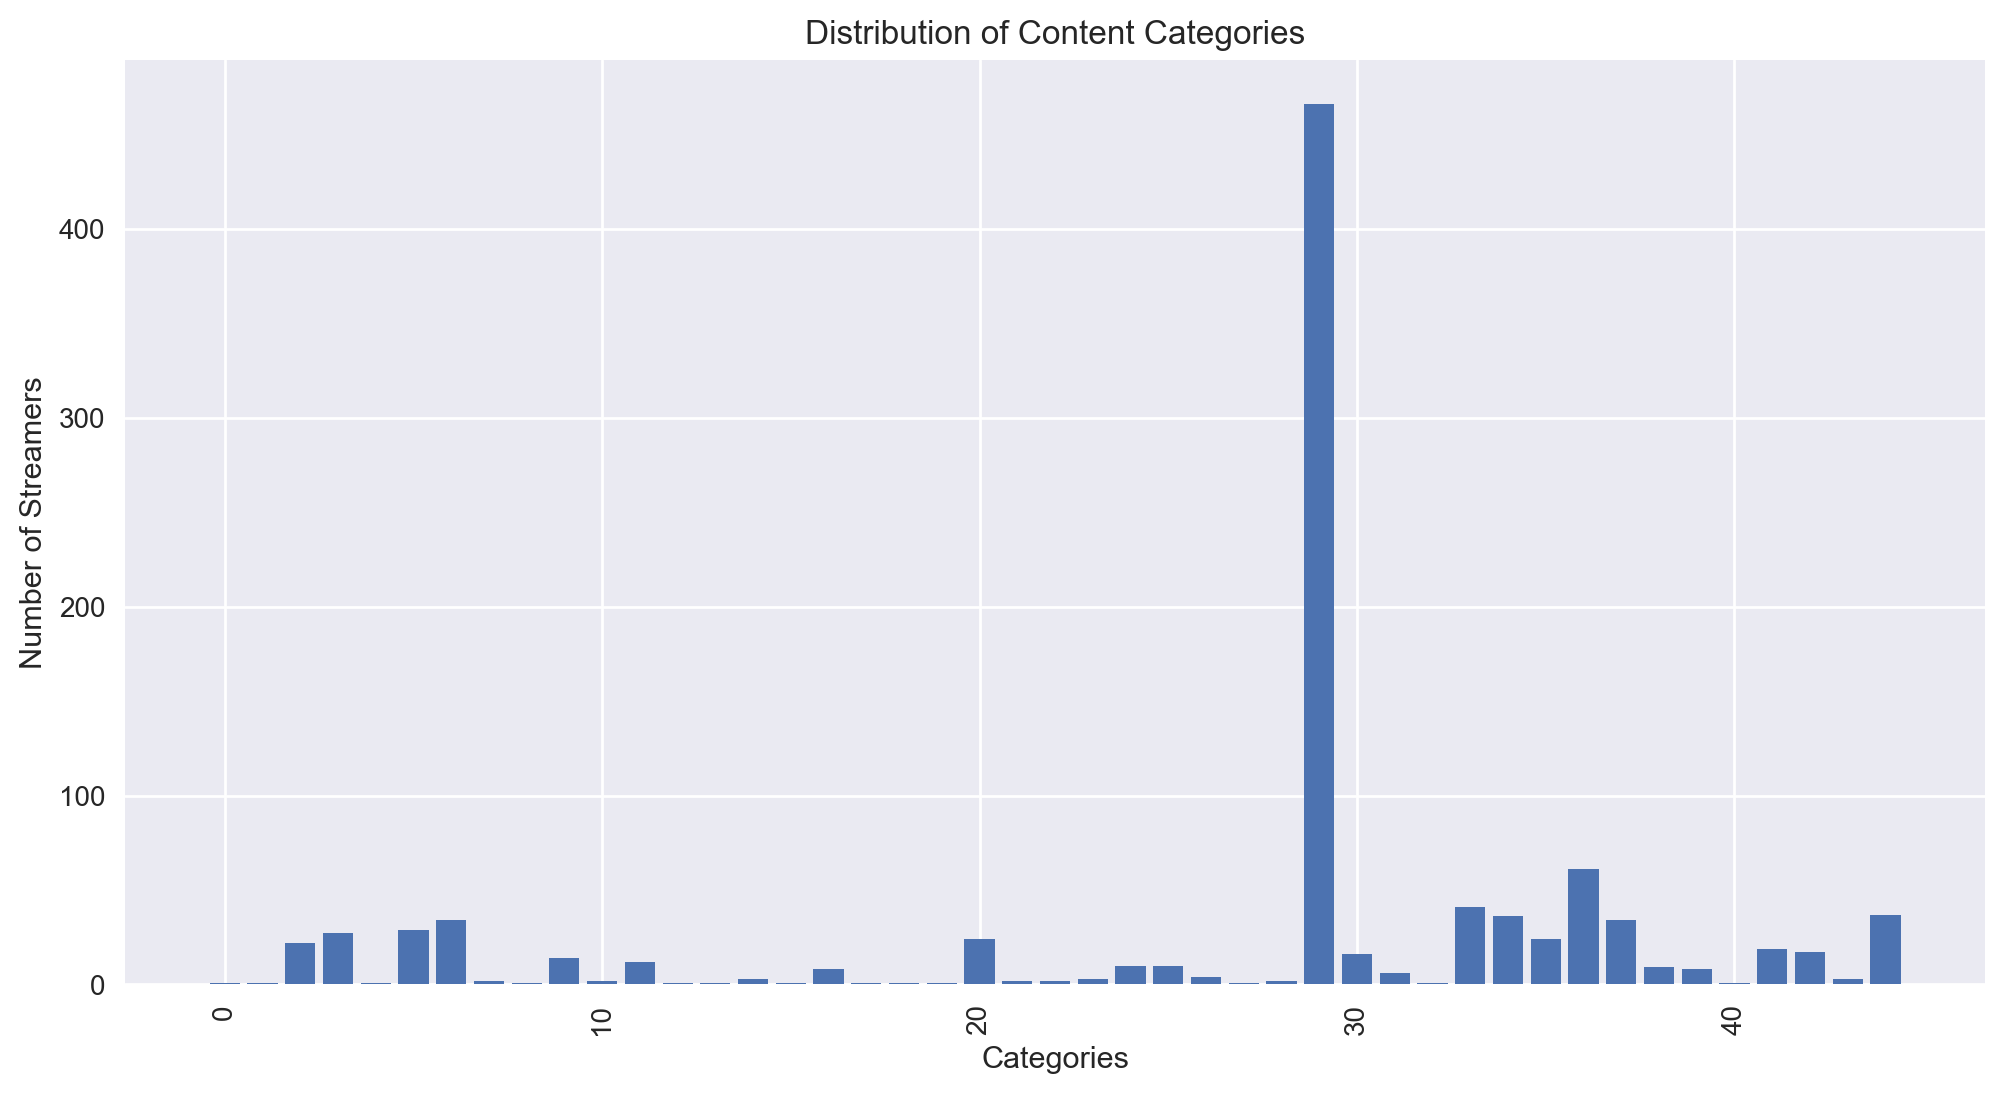

In [21]:
# Count the number of streamers in each category
category_counts = df['Categories'].value_counts()

# Create a bar chart to visualize the distribution of categories
plt.figure(figsize=(12, 6))
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of Content Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Streamers')
plt.xticks(rotation=90)
plt.show()

### Brands and Collaborations

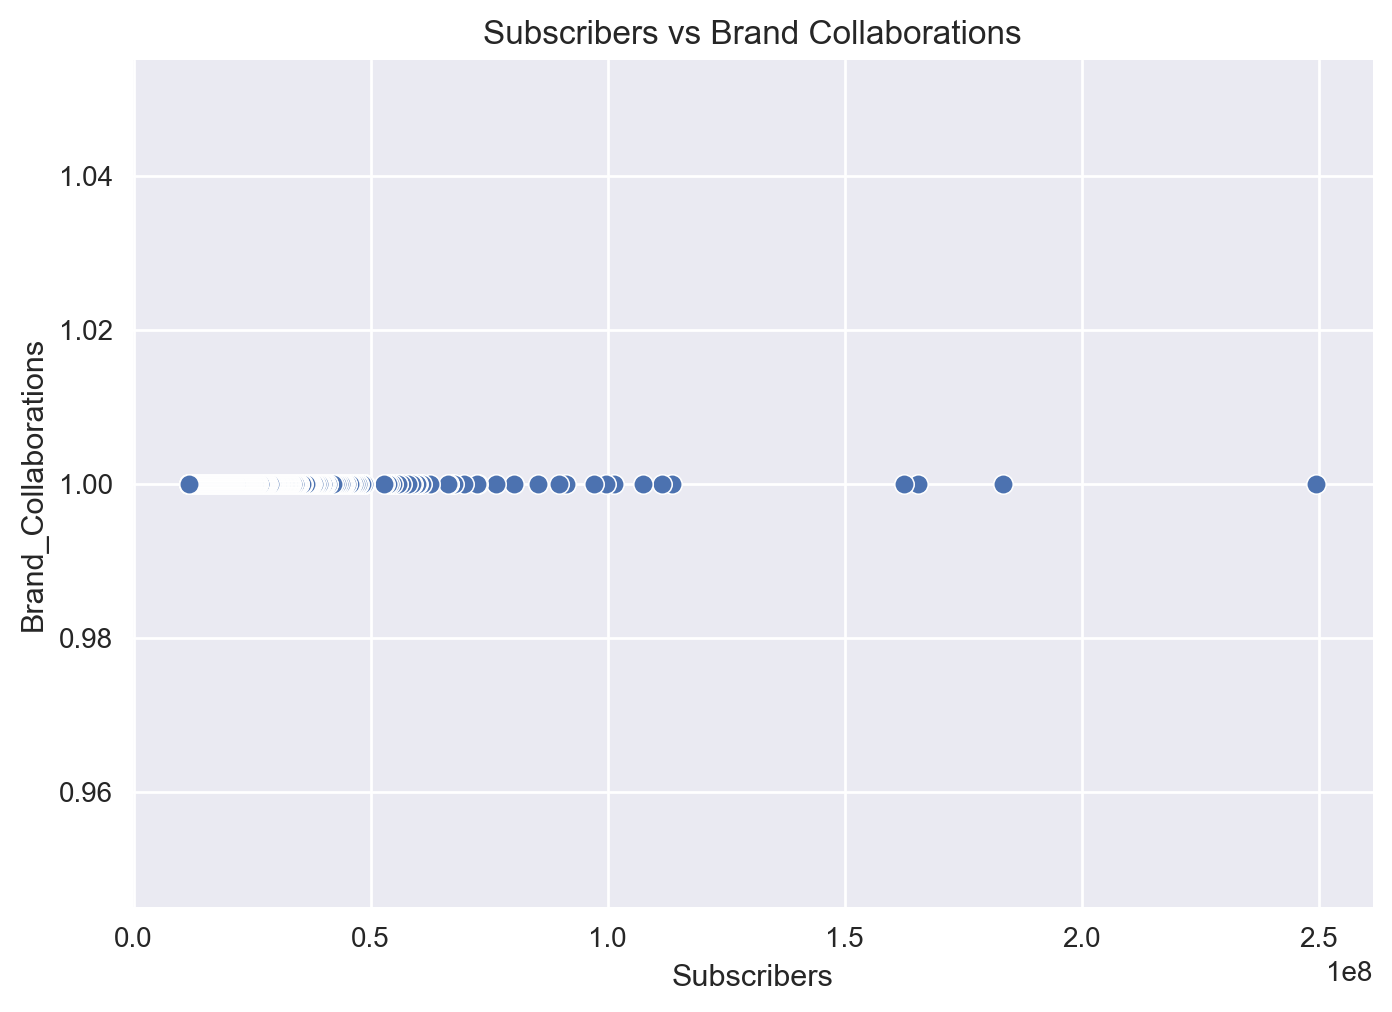

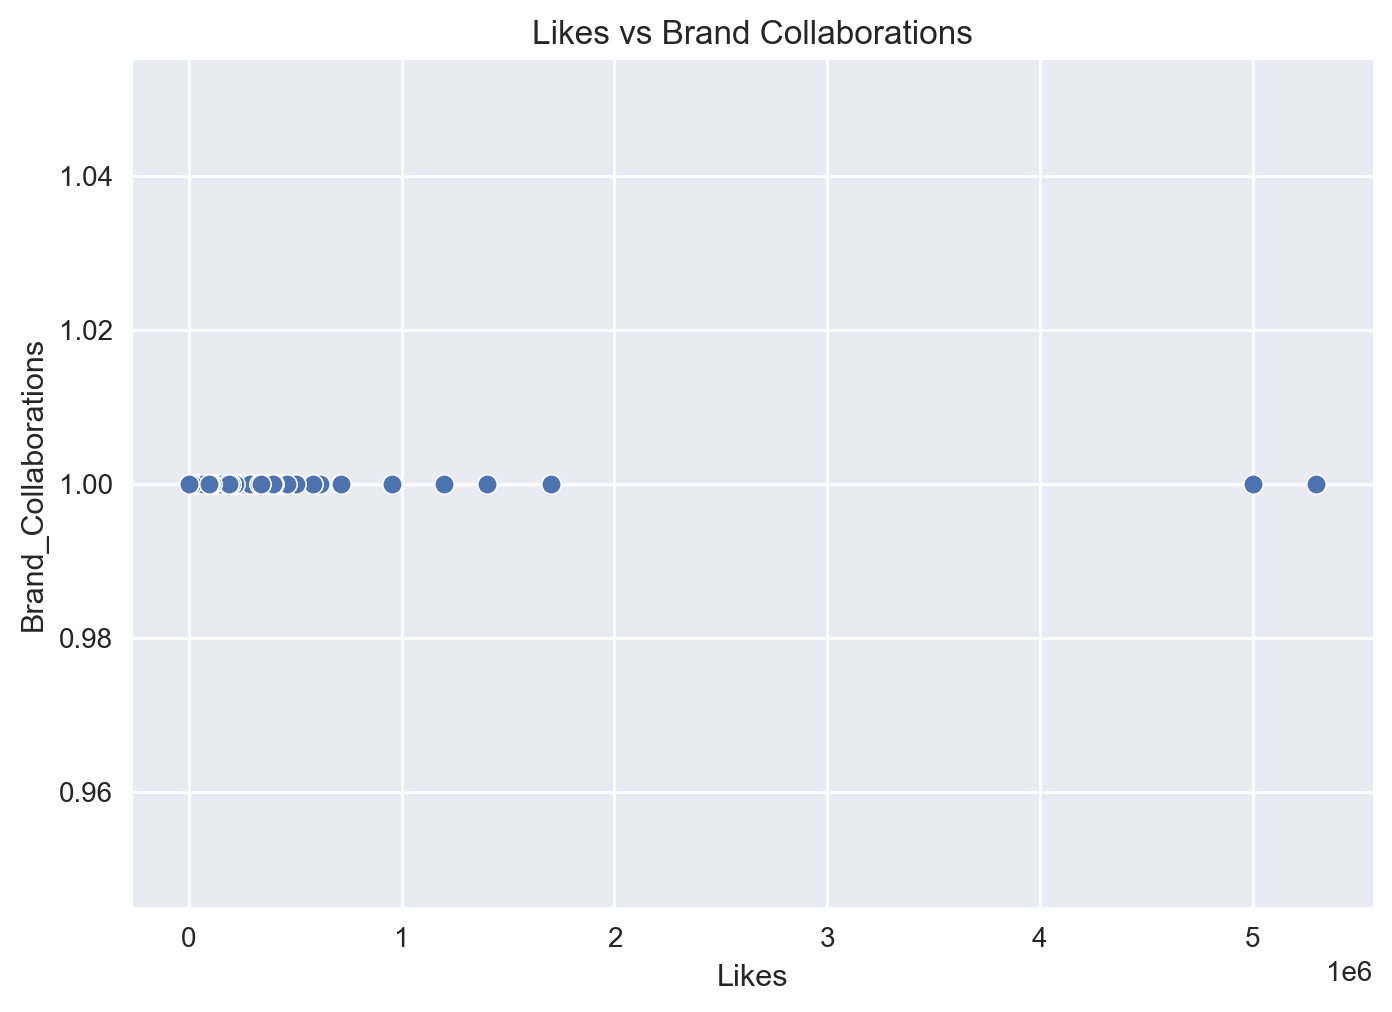

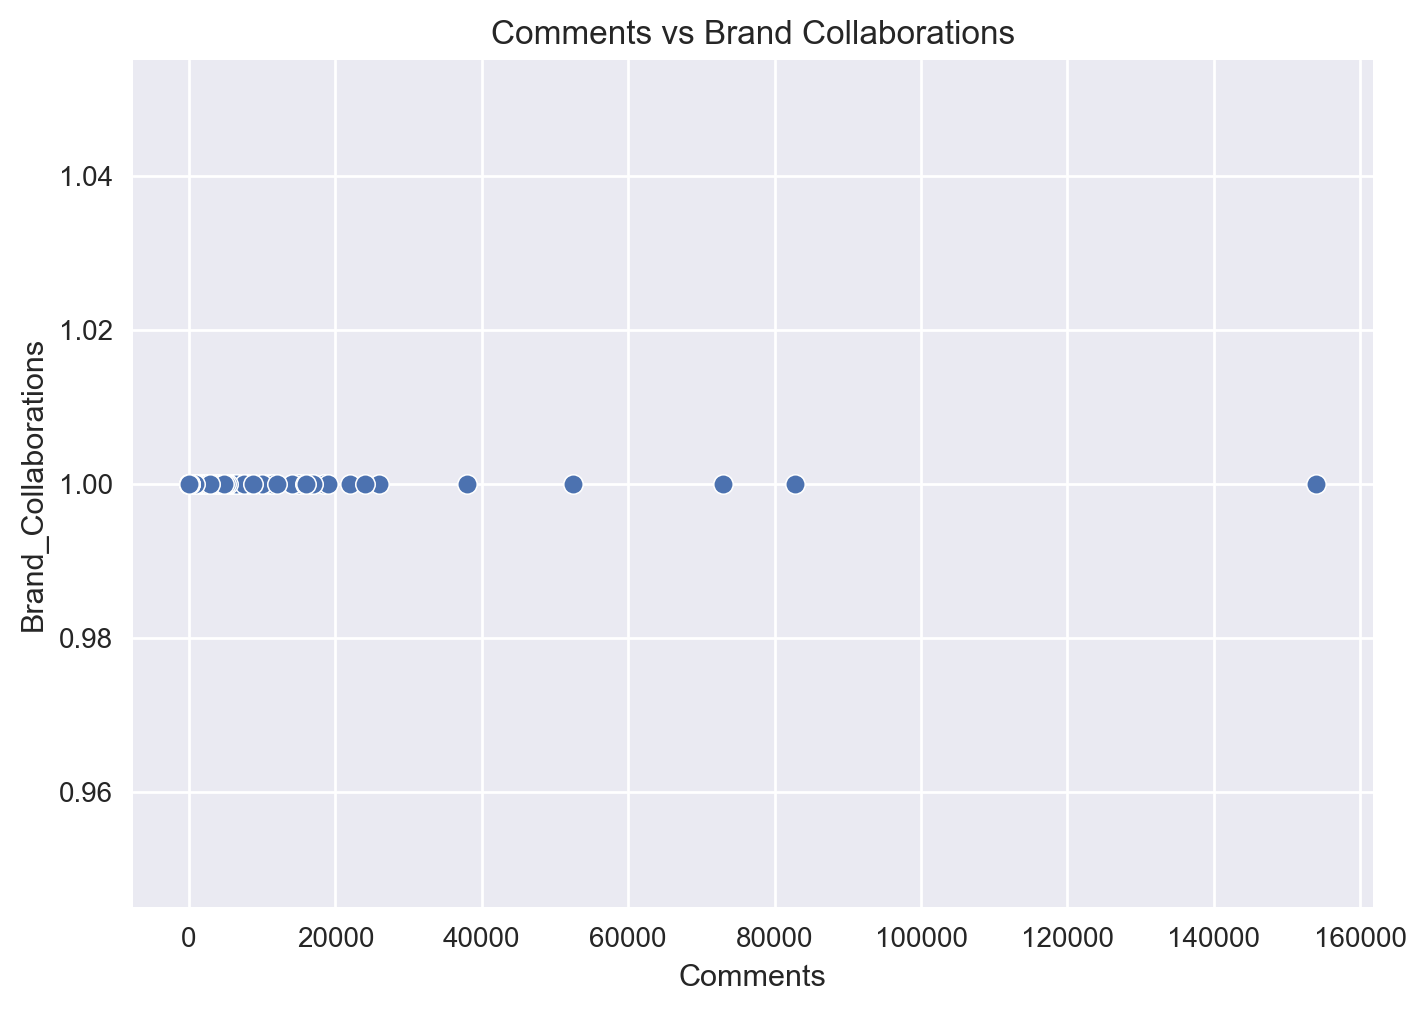

In [22]:
# Convert 'Links' to a binary indicator (1 for collaborations, 0 for no collaborations)
df['Brand_Collaborations'] = df['Links'].apply(lambda x: 1 if pd.notna(x) else 0)

# Scatter plot for subscribers vs brand collaborations
sns.scatterplot(x='Subscribers', y='Brand_Collaborations', data=df)
plt.title('Subscribers vs Brand Collaborations')
plt.show()

# Scatter plot for likes vs brand collaborations
sns.scatterplot(x='Likes', y='Brand_Collaborations', data=df)
plt.title('Likes vs Brand Collaborations')
plt.show()

# Scatter plot for comments vs brand collaborations
sns.scatterplot(x='Comments', y='Brand_Collaborations', data=df)
plt.title('Comments vs Brand Collaborations')
plt.show()

In [23]:
# Analyze the relationship between performance metrics and brand collaborations using correlation
correlation_subscribers_brand = df['Subscribers'].corr(df['Brand_Collaborations'])
correlation_likes_brand = df['Likes'].corr(df['Brand_Collaborations'])
correlation_comments_brand = df['Comments'].corr(df['Brand_Collaborations'])

print(f"Correlation between subscribers and brand collaborations: {correlation_subscribers_brand}")
print(f"Correlation between likes and brand collaborations: {correlation_likes_brand}")
print(f"Correlation between comments and brand collaborations: {correlation_comments_brand}")

Correlation between subscribers and brand collaborations: nan
Correlation between likes and brand collaborations: nan
Correlation between comments and brand collaborations: nan


### Benchmarking

In [24]:
# Calculate average metrics
average_subscribers = df['Subscribers'].mean()
average_visits = df['Visits'].mean()
average_likes = df['Likes'].mean()
average_comments = df['Comments'].mean()

# Set criteria for above-average performance (you can adjust these thresholds)
threshold_subscribers = 1.2 * average_subscribers
threshold_visits = 1.2 * average_visits
threshold_likes = 1.2 * average_likes
threshold_comments = 1.2 * average_comments

# Identify streamers with above-average performance
above_avg_streamers = df[
    (df['Subscribers'] > threshold_subscribers) &
    (df['Visits'] > threshold_visits) &
    (df['Likes'] > threshold_likes) &
    (df['Comments'] > threshold_comments)
]

# Display the top-performing streamers
top_performers = above_avg_streamers[['Username', 'Subscribers', 'Visits', 'Likes', 'Comments']]
print("Top-performing streamers:")
print(top_performers)

Top-performing streamers:
     Username  Subscribers       Visits      Likes  Comments
1         368  183500000.0  117400000.0  5300000.0   18500.0
5         430  111500000.0    2400000.0   197300.0    4900.0
26        699   59700000.0    5300000.0   156500.0    4200.0
34        526   54100000.0    4300000.0   300400.0   15000.0
39        258   48600000.0    2000000.0   117100.0    3000.0
43         14   47300000.0    9700000.0   330400.0   22000.0
58        358   43400000.0    2200000.0   183400.0    1800.0
62        278   42100000.0    5300000.0   271300.0   16000.0
64        809   41100000.0    2500000.0   128900.0    1800.0
96        557   36300000.0    1500000.0   129400.0    4900.0
98        530   35600000.0    6200000.0   341800.0   16500.0
100       819   35500000.0    2100000.0   126500.0    3800.0
122        26   32700000.0    3300000.0   382000.0   11400.0
123       329   32600000.0    6500000.0   617400.0   26000.0
131       713   32000000.0    7700000.0   412200.0   17000.

### Content recommendations

In [25]:
# for the content recommendation system, we can use a simple approach based on the streamers' 
# categories and performance metrics. 

In [26]:
# Select relevant columns for clustering
selected_columns = ['Subscribers', 'Visits', 'Likes', 'Comments']

# Normalize the selected columns
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df[selected_columns])

# Choose the number of clusters (you can experiment with this)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_normalized)

# Function to recommend top streamers from a given cluster
def recommend_streamers(cluster_id, num_recommendations=5):
    cluster_data = df[df['Cluster'] == cluster_id]
    recommended_streamers = cluster_data.sort_values(by='Subscribers', ascending=False).head(num_recommendations)
    return recommended_streamers[['Username', 'Categories', 'Subscribers', 'Country', 'Visits', 'Likes', 'Comments']]

# Example: Recommend top 5 streamers from Cluster 0
recommended_streamers_cluster_0 = recommend_streamers(0, num_recommendations=5)
print("Recommended Streamers from Cluster 0:")
print(recommended_streamers_cluster_0)

Recommended Streamers from Cluster 0:
   Username  Categories  Subscribers  Country     Visits     Likes  Comments
0       939          29  249500000.0       13    86200.0    2700.0      78.0
2       107          20  165500000.0       28  7000000.0   24700.0       0.0
3       467          29  162600000.0       13    15600.0     166.0       9.0
4       275           5  113500000.0       28  3900000.0   12400.0       0.0
5       430          39  111500000.0       10  2400000.0  197300.0    4900.0


### ----------------------------------------------------------------- END OF TASKS --------------------------------------------------------------------------